FINDING ROOTS OF f(x)=0 UNDER ASSUMPTIONS OF [SINGLE REAL ROOT, f is continuous]

2. Open methods - Start with (usually) one initial guess value, and successively get another value which is closer to the true root, till some criteria which determines how close the value is to the true root, becomes true. eg: Newton_Raphson method

i. Fixed point iteration - Let g(x)=f(x)+x. Then, we have to find roots of g(x)=x
    Find x_(i+1) = g(x_i), till |(x_(i+1) - x_i)/x_(i+1)| < rel_err
    This method conveges if |g'(x)| < 1. May or may not converge, otherwise.
    Linear convergence, since Error_(i+1) is proportional to Error_i.
    Proof given in lecture (using mean value theorem)

ii. Newton-Raphson method - X_(i+1) = X_i - f(X_i)/f'(X_i)
    This method also may or may not converge.
    Very fast if we know how to calculate derivative quickly, and method converges.
    Quadratic convergence, Error_(i+1) is proportional to (Error_i)^2.
    Does not work when function is flat, i.e, f'(X_i) = 0, May get into infinite loops

iii. Secant method - By replacing f'(X_i) by (f(X_i)-f(X_(i-1)))/(X_i - X_(i-1)) in Newton-Raphson method
    In this method, we need two initial guesses, for the iteration. This method is similar to False position method (which is a bracketing method), but the true root may or may not lie in between the guesses here.

In [2]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

FINDING ROOTS OF 3x^3+x-3=0 USING FIXED POINT ITERATION

g(x) = 3x^3+2x-3 gives overflow error (SEQUENCE DIVERGES)

So, we are choosing
g(x) = ((3-x)/3)^(1/3)

In [11]:
def f(x):
    return 3.0*x**3+x-3

def g(x):
    # return f(x)+x                 # Gives OVERFLOW ERROR since |g'(x)|>1 near the root
    return ((3.0-x)/3.0)**(1.0/3.0)

def dg(x):
    # return 9*x**2+2
    return -1.0/9.0 * (3.0/(3.0-x))**(2.0/3.0)

In [12]:
def fixpt(x0,es,imax):             # Fixed point iteration method
    xr = x0
    x=[]; e=[]; it=[]
    for i in range(imax):
        xr_old = xr
        xr = g(xr_old)
        if(xr!=0):
            ea = abs((xr-xr_old)/xr)*100
        it.append(i); x.append(xr); e.append(ea)
        if (ea < es):
            break
    return it,x,e

In [13]:
i3,x3,e3 = fixpt(2,1e-12,100)

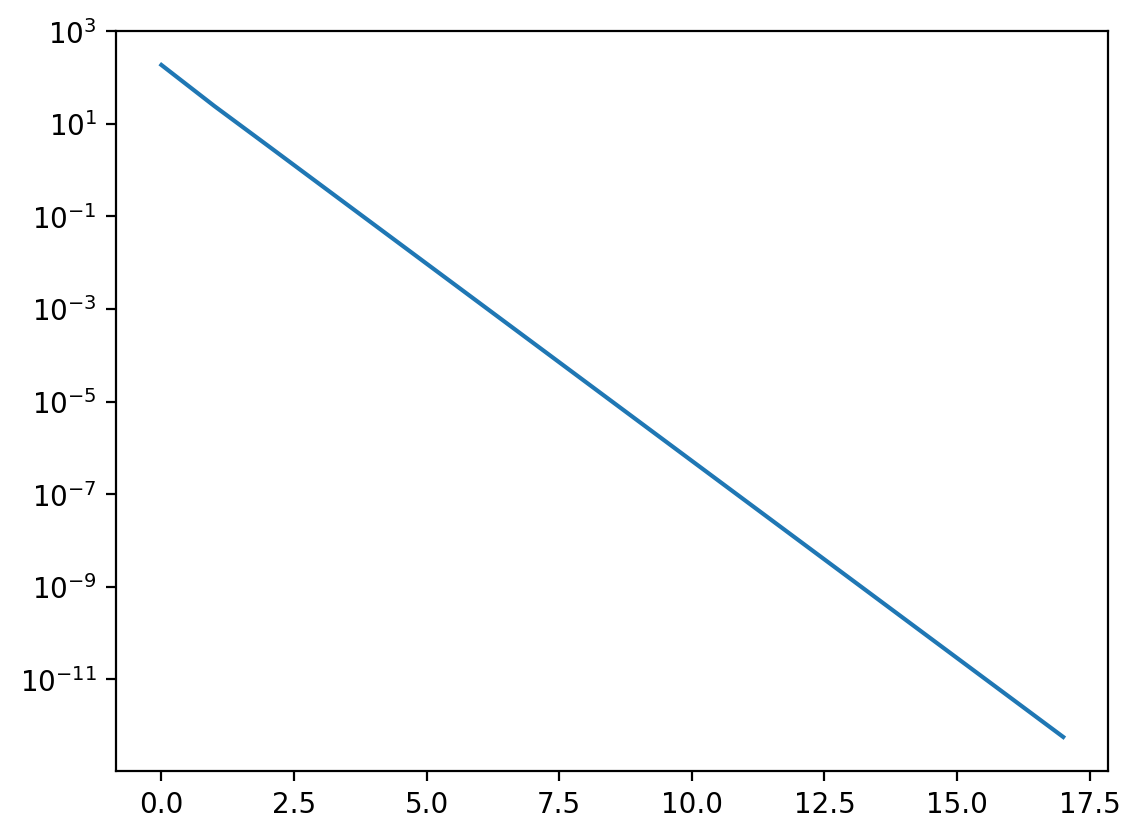

In [14]:
plt.plot(i3,e3,label="Fixpnt")
plt.yscale("log")
plt.show()

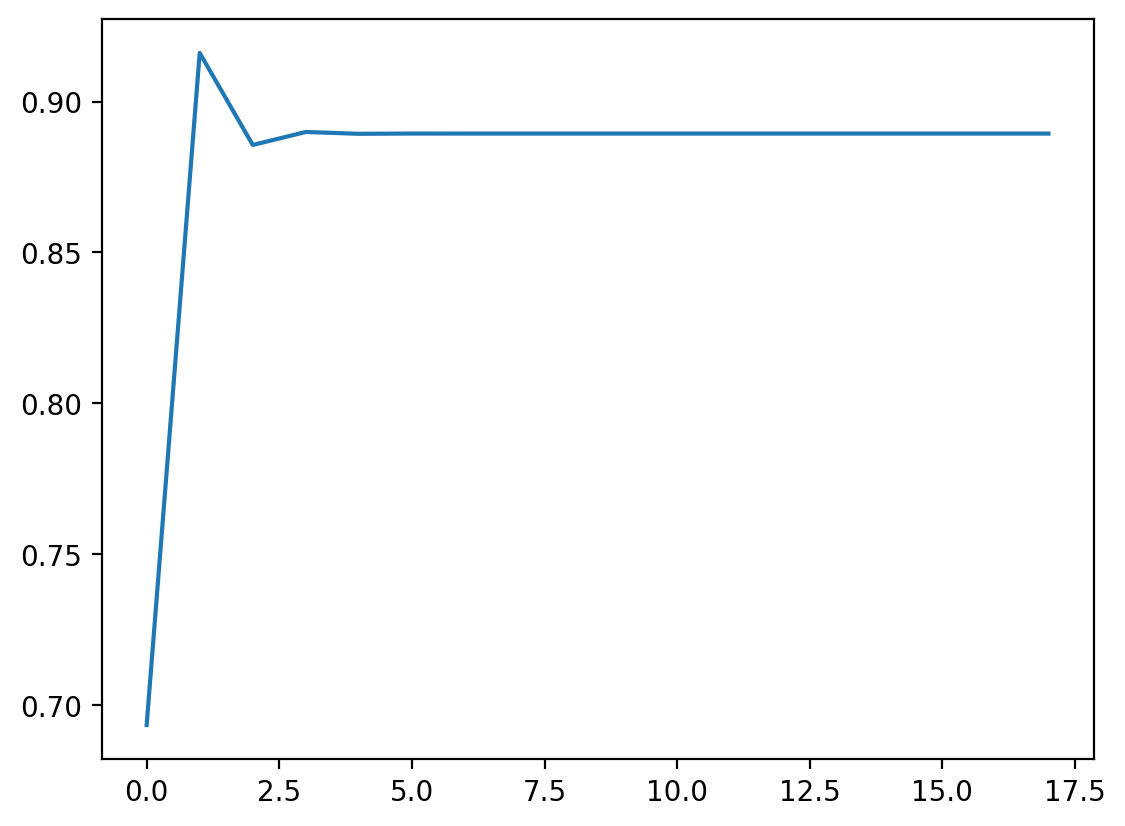

In [15]:
plt.plot(i3,x3,label="Fixpnt")
plt.yscale("linear")
plt.show()